In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
date_cleaner = pd.read_csv("/content/drive/MyDrive/Fall20_IntrotoDS_Final_Project/date_cleaner.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#def month_extractor(raw_date):
def month_extractor(raw_date,date_cleaner):
  clist = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
  nlist = ["'Month': '01'","'Month': '02'","'Month': '03'","'Month': '04'","'Month': '05'","'Month': '06'","'Month': '07'","'Month': '08'","'Month': '09'","'Month': '10'","'Month': '11'","'Month': '12'"]
  if raw_date.startswith("{'Year':"):
    for i in range(len(clist)):
      if clist[i] in raw_date:
        return i+1
      if nlist[i] in raw_date:
        return i+1
  if raw_date.startswith("{'MedlineDate':"):
    for i in date_cleaner['dirty_date']:
      if raw_date == i:
        return float(date_cleaner.loc[date_cleaner['dirty_date'] == i]['month'])

def visualization(file,date_cleaner):
  filepath = "/content/drive/MyDrive/Fall20_IntrotoDS_Final_Project/Archive/" + file
  df = pd.read_csv(filepath)
  #create a new column 'Month'
  #df['Month'] = df.apply(lambda row : month_extractor(row['PubDate']),axis=1 )
  df['Month'] = df.apply(lambda row : month_extractor(row['PubDate'],date_cleaner),axis=1)

  #create a new dataframe with new column "count_month"
  df_count = df.groupby(["Month"])["Month"].count().reset_index(name="Count")

  #show the number of publications in each month
  sns.barplot(x="Month",y="Count", ci=None, data=df_count)
  plt.ylabel("Number of Publications")
  plt.title("Number of publications in each month", size=20)
  #plot values
  a = plt.gca()
  for p in a.patches:
    a.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), fontsize=8, ha='center', va='bottom')  
  plt.show()

  #visualize the trend of the publication numbers over time  
  ax = sns.lineplot(x= 'Month', y= 'Count', marker= "o", data=df_count)
  plt.title("Trend of the publication numbers over time", size=20)
  ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
  plt.show()

  # create a histogram
  sns.histplot(df_count, x='Count')
  plt.xlabel("Number of publications per month")
  plt.show()

  #create a boxplot to show summary statistics
  sns.boxplot(x="Count",showmeans=True,meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black"},
              data=df_count)
  plt.title("Summary statistics for the publication numbers per month", size=15)
  # generate summary statistics
  print(df_count['Count'].describe())

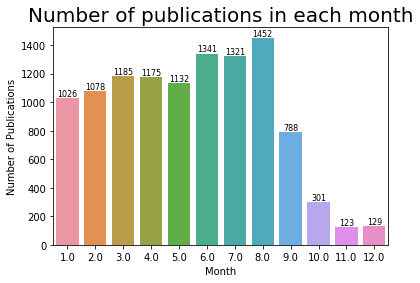

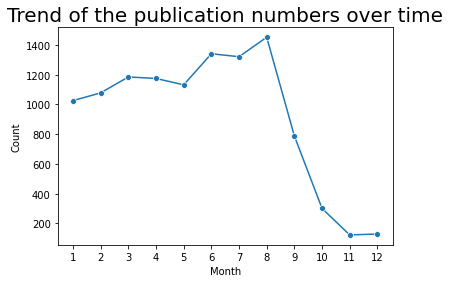

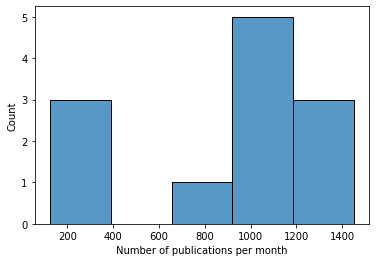

count      12.000000
mean      920.916667
std       476.628778
min       123.000000
25%       666.250000
50%      1105.000000
75%      1219.000000
max      1452.000000
Name: Count, dtype: float64


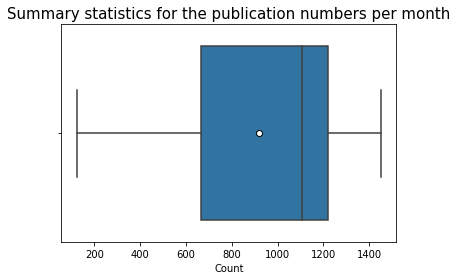

In [ ]:
visualization('hiv_pull.csv',date_cleaner)